In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv("Social_Network_Ads.csv")

In [3]:
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
dataset=pd.get_dummies(dataset,drop_first=True)

In [5]:
dataset

,User ID,Age,EstimatedSalary,Purchased,Gender_Male
0,15624510,19,19000,0,1
1,15810944,35,20000,0,1
2,15668575,26,43000,0,0
3,15603246,27,57000,0,0
4,15804002,19,76000,0,1
...,...,...,...,...,...
395,15691863,46,41000,1,0
396,15706071,51,23000,1,1
397,15654296,50,20000,1,0
398,15755018,36,33000,0,1


In [6]:
dataset.drop("User ID",axis=1)

,Age,EstimatedSalary,Purchased,Gender_Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1
...,...,...,...,...
395,46,41000,1,0
396,51,23000,1,1
397,50,20000,1,0
398,36,33000,0,1


In [7]:
dataset["Purchased"].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [8]:
dataset.columns

Index(['User ID', 'Age', 'EstimatedSalary', 'Purchased', 'Gender_Male'], dtype='object')

In [9]:
independent=dataset[['Age', 'EstimatedSalary','Gender_Male']]

In [10]:
independent

,Age,EstimatedSalary,Gender_Male
0,19,19000,1
1,35,20000,1
2,26,43000,0
3,27,57000,0
4,19,76000,1
...,...,...,...
395,46,41000,0
396,51,23000,1
397,50,20000,0
398,36,33000,1


In [12]:
dependent=dataset[['Purchased']]

In [13]:
dependent

,Purchased
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,0


In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(independent,dependent,test_size=1/3,random_state=0)

In [15]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()
classifier=classifier.fit(X_train,y_train)

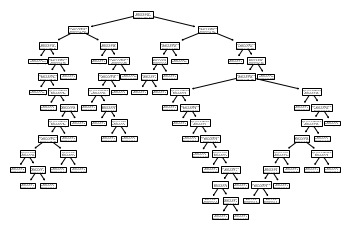

In [16]:
import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(classifier)
plt.show()

In [17]:
y_pred=classifier.predict(X_test)

In [18]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [19]:
print(cm)

[[79  6]
 [11 38]]


In [20]:
from sklearn.metrics import classification_report
clf_report=classification_report(y_test,y_pred)
print(clf_report)

              precision    recall  f1-score   support

           0       0.88      0.93      0.90        85
           1       0.86      0.78      0.82        49

    accuracy                           0.87       134
   macro avg       0.87      0.85      0.86       134
weighted avg       0.87      0.87      0.87       134



In [ ]:
age_input=float(input("Enter the Age: "))
salary_input=float(input("Enter the Estimated salary : "))
sex_male_input=int(input("Enter the Male 0 or 1 : "))
classifier.predict([[age_input,salary_input,sex_male_input]])
dir(clf_report)